# Quiz 4
#### Muhamad Rizal Arfiyan - 22.11.5227 - IF11
#### [https://github.com/rizalarfiyan/big-data](https://github.com/rizalarfiyan/big-data)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
path = "./pemupukan_hasil_panen.csv"
df = pd.read_csv(path)
df

,Pemupukan,Hasil_panen
0,3,12
1,6,23
2,9,24
3,10,26
4,13,28
5,16,30
6,19,33
7,20,34
8,23,37
9,24,39


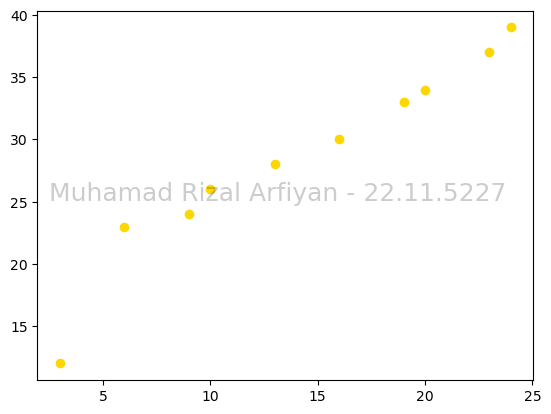

In [4]:
plt.scatter(df["Pemupukan"], df["Hasil_panen"], color="gold")
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=18,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
)
plt.show()

In [5]:
coef = np.corrcoef(df["Pemupukan"], df["Hasil_panen"])
print(coef)

[[1.         0.96514646]
 [0.96514646 1.        ]]


             Pemupukan  Hasil_panen
Pemupukan     1.000000     0.965146
Hasil_panen   0.965146     1.000000


<Axes: >

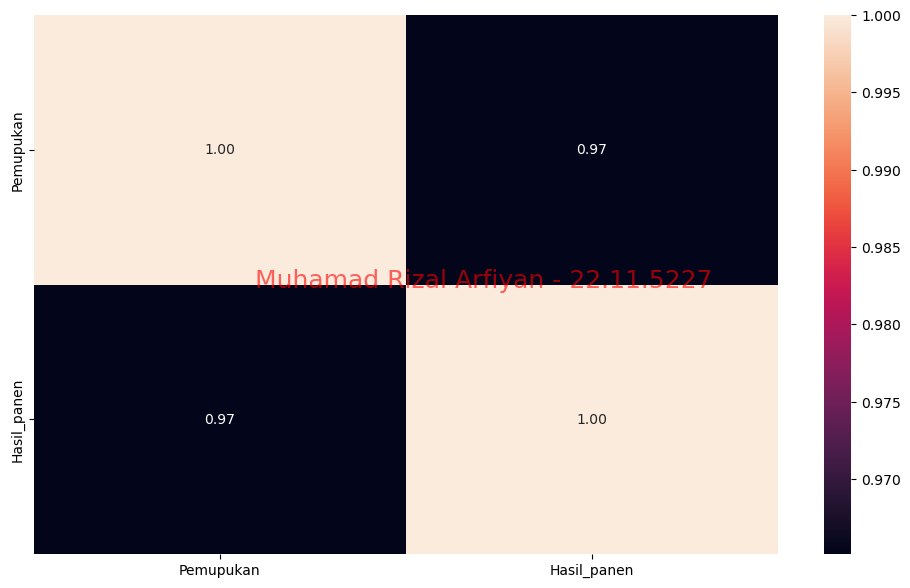

In [6]:
plt.figure(figsize=(12, 7))

corr = df.corr()
print(corr)

plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=18,
    color="red",
    ha="center",
    va="center",
    alpha=0.6,
    transform=plt.gcf().transFigure,
)
sns.heatmap(corr, annot=True, fmt=".2f")

## Data Preparation
### Membagi data train dan test

In [7]:
np.random.seed(42)
split = np.random.rand(len(df)) < 0.8
train = df[split]
test = df[~split]

print(test)
print(train)

   Pemupukan  Hasil_panen
1          6           23
7         20           34
   Pemupukan  Hasil_panen
0          3           12
2          9           24
3         10           26
4         13           28
5         16           30
6         19           33
8         23           37
9         24           39


In [8]:
X_train = np.asanyarray(train[["Pemupukan"]])
y_train = np.asanyarray(train[["Hasil_panen"]])

X_test = np.asanyarray(test[["Pemupukan"]])
y_test = np.asanyarray(test[["Hasil_panen"]])

### Modeling

In [9]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Coefficient dan Intercept
print("Coefficients: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Coefficients:  [[1.13788442]]
Intercept:  [11.98344035]


Text(0, 0.5, 'Hasil Panen')

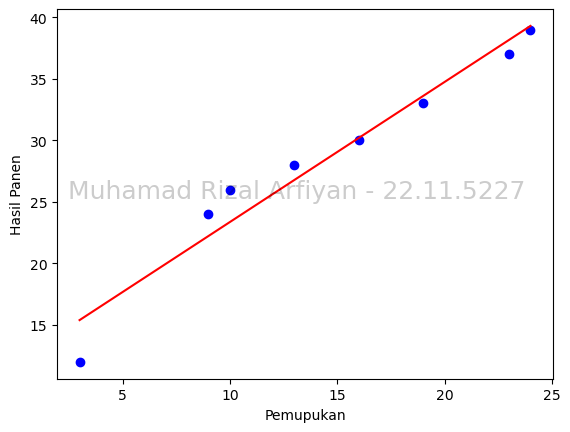

In [11]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, lr_model.coef_[0][0] * X_train + lr_model.intercept_[0], "-r")
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=18,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
)
plt.xlabel("Pemupukan")
plt.ylabel("Hasil Panen")

### Prediksi

In [12]:
y_pred = lr_model.predict(X_test)

print("Data asli: \n", y_test[0:10])
print("\n")
print("Hasil prediksi: \n", y_pred[0:10])

Data asli: 
 [[23]
 [34]]


Hasil prediksi: 
 [[18.81074687]
 [34.74112876]]


In [13]:
X_test

array([[ 6],
       [20]])

In [12]:
data = np.array([[27], [30], [35]])
lr_model.predict(data)

array([[42.7063197 ],
       [46.11997296],
       [51.80939507]])

In [13]:
pemupukan = [27, 30, 35]
for val in pemupukan:
    print(val, " -> ", lr_model.predict([[val]])[0][0])

27  ->  42.70631970260223
30  ->  46.11997296383913
35  ->  51.809395065900645


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_pred, y_test))
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 2.47
Mean Squared Error (MSE): 9.05
